<a href="https://colab.research.google.com/github/RAHULRAJ666DX/Startups-Profit-Prediction-Machine-Learning-Project/blob/main/Startups%20Profit%20Prediction%20Machine%20Learning%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Startups Profit Prediction Machine Learning Project**

# <u> Implementing Multiple Linear Regression </u>

### <u> Objective </u>
* ### To predict the profit made by a startup on the basis of expenses incurred and the state where they operate

# **Data Preprocessing**

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import math

#sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Importing the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/RAHULRAJ666DX/50_StartUps_Linear_Regression_Project/main/50_Startups.csv')

dataset1 = dataset.copy()

In [ ]:
# Checking the length of Dataset
len(dataset)

50

In [ ]:
# Checking the Dataset
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
# Shape of Dataset
dataset.shape

(50, 5)

**Pair Plot is the best plot to check all the Correlation in the dataset at once**

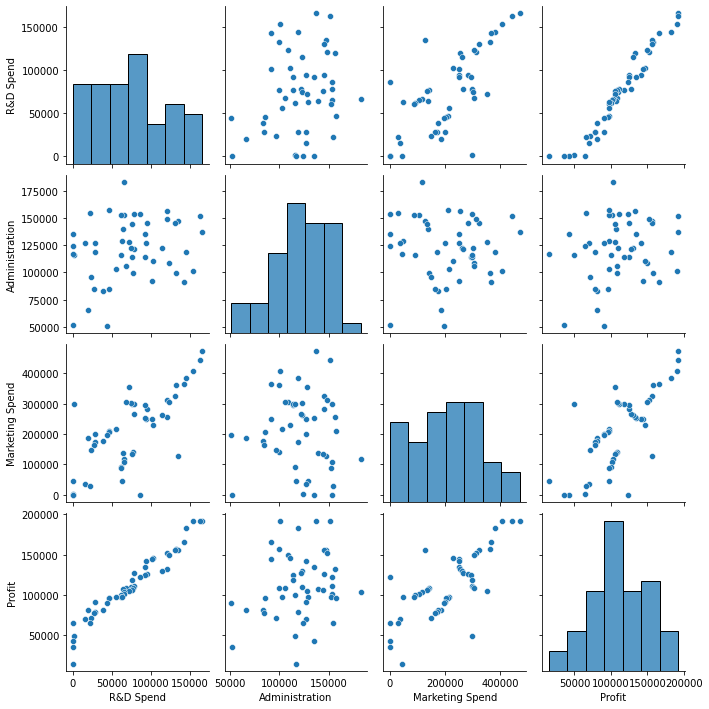

In [ ]:
import seaborn as sns
sns.pairplot(dataset)

In [ ]:
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

### **Creating a Loop for Scatter plots to check the relation between the Independent and the dependent variables**

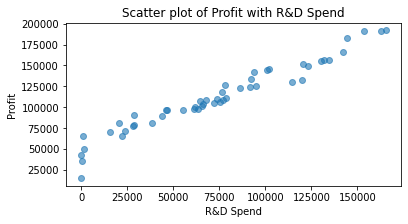

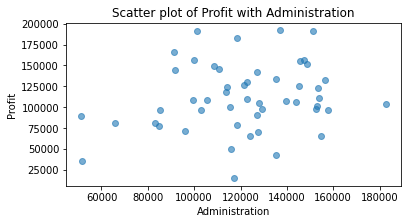

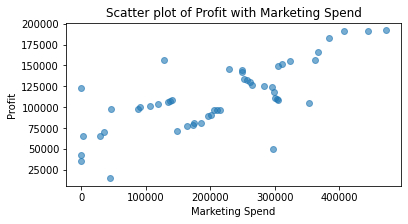

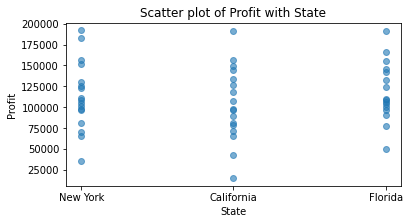

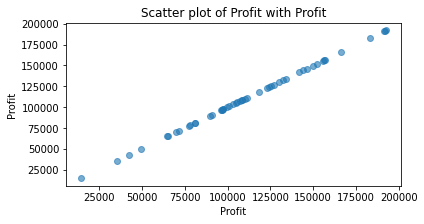

In [ ]:
for col in dataset.columns:
  plt.figure(figsize=(6, 3))
  plt.scatter(dataset[col],dataset['Profit'],alpha=0.6)
  plt.title(f"Scatter plot of Profit with {col}")
  plt.xlabel(f"{col}")
  plt.ylabel('Profit')
  plt.show()


### **Creating a Loop to plot REGPLOT (scatter,regression line) to check the relation between variables and a possible regression line estimation**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


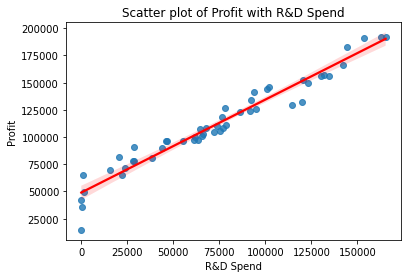

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


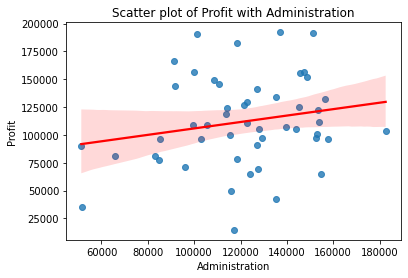

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


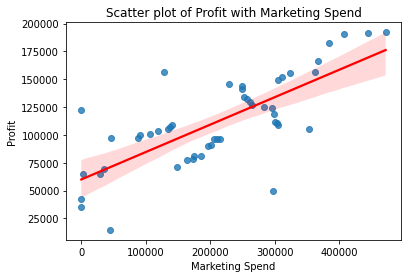

In [ ]:
for col in dataset.columns[:3]:

  sns.regplot(dataset[col].astype(float),dataset['Profit'],line_kws={'color':'red'})
  plt.title(f"Scatter plot of Profit with {col}")
  plt.xlabel(f"{col}")
  plt.ylabel('Profit')
  plt.show()

From the Regplot we can say that Marketing Spend, Administration, R&D spend has positive correlation with Profit

### **Checking the Correlation and Plotting the Heatmap for the dataset**

In [ ]:
dataset1.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


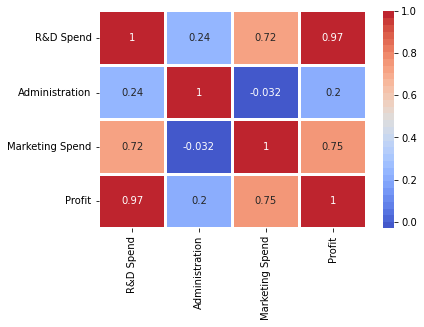

In [ ]:
sns.heatmap(dataset1.corr(), cmap=sns.color_palette("coolwarm", 32),annot=True, linewidths=2, linecolor='white')

### **Checking the "State" column unique values**


In [ ]:
# Checking the "State" column unique values
dataset1.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

**As we can see we have 3 different states name in the column and we will try to Groupby interms of Profit**

In [ ]:
dataset.State.value_counts().reset_index()

,index,State
0,New York,17
1,California,17
2,Florida,16


Text(0, 0.5, 'Profit')

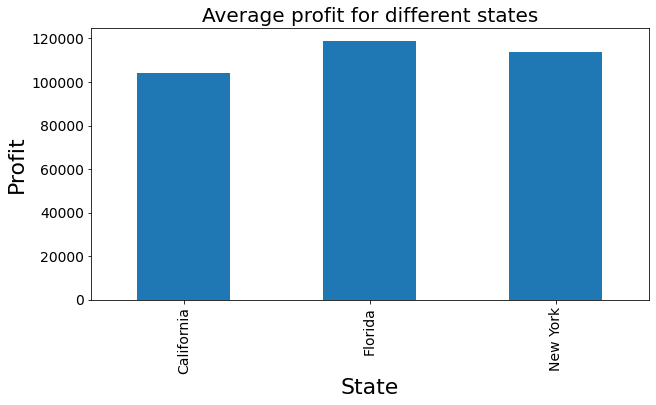

In [ ]:
# Create the figure object
ax = dataset1.groupby(['State'])['Profit'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14
)

# Set the title
ax.set_title("Average profit for different states", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("State", fontsize = 22)
ax.set_ylabel("Profit", fontsize = 22)

### **Creating a Dummy Variable for State Column to convert it into a numerical column**

In [ ]:
dataset1.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [ ]:
# Create dummy variables for the catgeorical variable State
# dataset['NewYork_State'] = np.where(dataset['State']=='New York', 1, 0)
# dataset['California_State'] = np.where(dataset['State']=='California', 1, 0)
# dataset['Florida_State'] = np.where(dataset['State']=='Florida', 1, 0)

In [ ]:
dataset1 = pd.get_dummies(dataset1)
dataset1.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


Since we now have all the columns with Numerical Data we can now Divide them into Independent and Dependent dataframes

In [ ]:
dataset1.drop(columns=['Profit'], inplace=True)


In [ ]:
Independent = dataset1
Independent.head(2)

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.2,136897.80,471784.10,0,0,1
1,162597.7,151377.59,443898.53,1,0,0


In [ ]:
Dependent = dataset['Profit']
Dependent.head(3).reset_index()

,index,Profit
0,0,192261.83
1,1,191792.06
2,2,191050.39


In [ ]:
Independent.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State_California',
       'State_Florida', 'State_New York'],
      dtype='object')

### **Creating "DISPLOT' to check the distribution of Data points**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


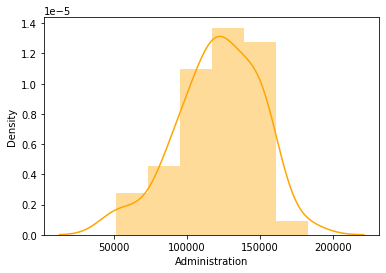

In [ ]:
sns.distplot((dataset['Administration']),color="orange")


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


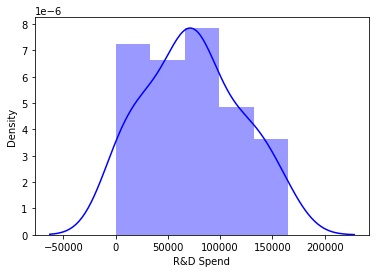

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


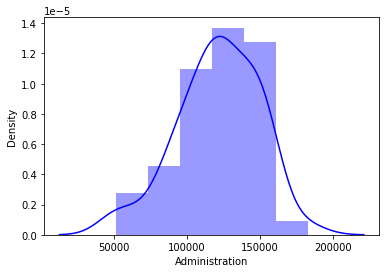

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


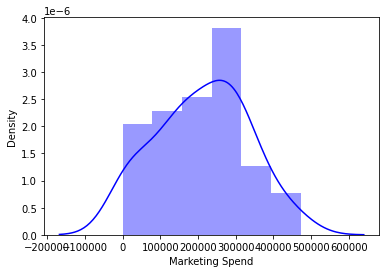

In [ ]:
for col in Independent.columns[:3]:
  sns.distplot((dataset[col]),color="b")
  # sns.distplot(np.log(dataset['price']),color="blue")
  plt.show()

### **Most of the data is not extremely skewed so we do not have to use log transformation**

# **Linear Regression implementation**

## **TRAIN and TEST Splitting**

In [ ]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(Independent, Dependent, test_size = 0.2, random_state = 0)

In [ ]:
X_train[0:10]

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
33,55493.95,103057.49,214634.81,0,1,0
35,46014.02,85047.44,205517.64,0,0,1
26,75328.87,144135.98,134050.07,0,1,0
34,46426.07,157693.92,210797.67,1,0,0
18,91749.16,114175.79,294919.57,0,1,0
7,130298.13,145530.06,323876.68,0,1,0
14,119943.24,156547.42,256512.92,0,1,0
45,1000.23,124153.04,1903.93,0,0,1
48,542.05,51743.15,0.00,0,0,1
29,65605.48,153032.06,107138.38,0,0,1


## **Scaling The Data using MinMaxScalar**

In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train[0:10]

array([[0.33561668, 0.48655174, 0.45494286, 0.        , 1.        ,
        0.        ],
       [0.2782839 , 0.3173015 , 0.43561799, 0.        , 0.        ,
        1.        ],
       [0.45557444, 0.87258866, 0.28413435, 0.        , 1.        ,
        0.        ],
       [0.2807759 , 1.        , 0.44680961, 1.        , 0.        ,
        0.        ],
       [0.55488118, 0.59103645, 0.62511553, 0.        , 1.        ,
        0.        ],
       [0.7880179 , 0.88568959, 0.68649342, 0.        , 1.        ,
        0.        ],
       [0.72539353, 0.98922572, 0.54370828, 0.        , 1.        ,
        0.        ],
       [0.0060492 , 0.6847981 , 0.0040356 , 0.        , 0.        ,
        1.        ],
       [0.00327821, 0.00432296, 0.        , 0.        , 0.        ,
        1.        ],
       [0.39676926, 0.95618996, 0.22709197, 0.        , 0.        ,
        1.        ]])

We can see the entire data is not in between 0 and 1

## **Regression Line Fitting**

In [ ]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Linear Regression Intercept
regressor.intercept_

44153.95466784855

In [ ]:
regressor.coef_

array([ 1.27892182e+05,  3.49927567e+03,  1.72720281e+04,  8.66383692e+01,
       -8.72645791e+02,  7.86007422e+02])

In [ ]:
Independent.head(2)

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.2,136897.80,471784.10,0,0,1
1,162597.7,151377.59,443898.53,1,0,0


In [ ]:
Independent.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State_California',
       'State_Florida', 'State_New York'],
      dtype='object')

**Predicting the Test set results**


In [ ]:
# Predicting the Test set results
y_pred_test = regressor.predict(X_test)
y_pred_test

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

**Predicting the Train data**

In [ ]:
# Predicting the Test set results
y_pred_train = regressor.predict(X_train)
y_pred_train

array([ 95764.42320496,  89164.62849777, 109506.72329085,  91366.2188941 ,
       127111.48666646, 159019.04337114, 148905.9881254 ,  48179.60744028,
        45374.34722508, 102951.9596798 , 145449.63178399,  96684.71387299,
        97535.3576194 , 116571.15139254,  69421.13311312, 116212.62095133,
        60736.53267612, 152787.95464277, 127413.0337311 , 102210.16391827,
       161822.7226407 , 131583.61511491,  75019.09161337,  48054.91969394,
       189547.28196893, 127528.92248422,  85540.50570954, 111255.8251405 ,
       156191.10124356, 108464.25100331,  75306.81185049, 119915.38726755,
       115144.58914955, 152688.90677959,  81513.47163492,  57298.28613018,
       172852.28336637, 192919.57537462,  47007.62737751,  65835.99435878])

## **Comparing the Predicted and Actual Data**

In [ ]:
# Actual Train Data
print(y_train)

33     96778.92
35     96479.51
26    105733.54
34     96712.80
18    124266.90
7     155752.60
14    132602.65
45     64926.08
48     35673.41
29    101004.64
15    129917.04
30     99937.59
32     97427.84
16    126992.93
42     71498.49
20    118474.03
43     69758.98
8     152211.77
13    134307.35
25    107404.34
5     156991.12
17    125370.37
40     78239.91
49     14681.40
1     191792.06
12    141585.52
37     89949.14
24    108552.04
6     156122.51
23    108733.99
36     90708.19
21    111313.02
19    122776.86
9     149759.96
39     81005.76
46     49490.75
3     182901.99
0     192261.83
47     42559.73
44     65200.33
Name: Profit, dtype: float64


In [ ]:
#Predicted profit on the train data
y_pred_train

array([ 95764.42320496,  89164.62849777, 109506.72329085,  91366.2188941 ,
       127111.48666646, 159019.04337114, 148905.9881254 ,  48179.60744028,
        45374.34722508, 102951.9596798 , 145449.63178399,  96684.71387299,
        97535.3576194 , 116571.15139254,  69421.13311312, 116212.62095133,
        60736.53267612, 152787.95464277, 127413.0337311 , 102210.16391827,
       161822.7226407 , 131583.61511491,  75019.09161337,  48054.91969394,
       189547.28196893, 127528.92248422,  85540.50570954, 111255.8251405 ,
       156191.10124356, 108464.25100331,  75306.81185049, 119915.38726755,
       115144.58914955, 152688.90677959,  81513.47163492,  57298.28613018,
       172852.28336637, 192919.57537462,  47007.62737751,  65835.99435878])

In [ ]:
# Actual profits on test data
y_test

28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
Name: Profit, dtype: float64

In [ ]:
# Predicted Test Data
y_pred_test = regressor.predict(X_test)
y_pred_test

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

## **Finding out Errors and Performance**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_train,y_pred_train)

0.9501847627493607

In [ ]:
r2_score(y_test,y_pred_test)

0.9347068473282426

In [ ]:
regressor.score(X_test,y_test)

0.9347068473282426

### **Training performance is 95.018% and Test is 93.47%**

### **Plot to compare Actual and Predicted values in Linear Regression**

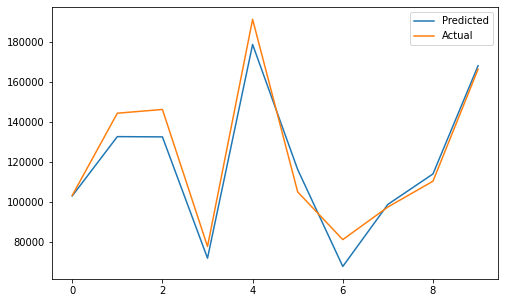

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

### **Checking the Mean Squared Error**

In [ ]:
# mean_squared_error(y_train, y_pred_train)
Linear_MSE = mean_squared_error(y_test, y_pred_test)
Linear_MSE

83502864.03257725

In [ ]:
# MAE
Linear_MAE = mean_absolute_error(y_test, y_pred_test)
Linear_MAE

7514.2936596406

**Mean squared error for the model = 83502864.03**

**Mean absolute error for the model = 7514.29**

### **Root Mean Square Value**


In [ ]:
# Train performance
math.sqrt(mean_squared_error(y_train, y_pred_train))

9031.66661257897

In [ ]:
# Test performance
Linear_RMSE = math.sqrt(mean_squared_error(y_test, y_pred_test))
Linear_RMSE

9137.990152794937

**RMSE_test = 9137.99**

In [ ]:
# R square
r2_score(y_train, y_pred_train)

0.9501847627493607

In [ ]:
r2_score(y_test, y_pred_test)


0.9347068473282426

**R2 score for Train Data = 0.9501**

**R2 score for Test Data = 0.9347**

## **Adjusted r2**

In [ ]:
X_test.shape,y_test.shape

((10, 6), (10,))

In [ ]:
r2 = r2_score(y_test, y_pred_test)
r2

0.9347068473282426

In [ ]:
n = X_test.shape[0]
k = X_test.shape[1]

# Calculate the adjusted R-squared
radj = 1 - (1 - r2) * (n - 1) / (n - k - 1)
print(f'Adjusted R-squared: {radj:.4f}')

Adjusted R-squared: 0.8041


# **Linear Regression**
Mean squared error = **83502864.03**

Mean absolute error = **7514.29**

Root Mean squared error = **9137.99**

R2 score for Train Data = **0.9501**

R2 score for Test Data = **0.9347**

Adjusted R-square = **0.8041**

# **Lasso**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [ ]:
lasso = Lasso()
lasso.fit(X_train,y_train)

Lasso()

In [ ]:
lasso_y_test = lasso.predict(X_test)
lasso_y_train = lasso.predict(X_train)

In [ ]:
# Mean Squared Error
mean_lasso_reg = mean_squared_error(y_test,lasso_y_test)
mean_lasso_reg

83385123.79965124

In [ ]:
# Root Mean Squared Error
rmse_lasso_reg = math.sqrt(mean_squared_error(y_test,lasso_y_test))
rmse_lasso_reg

9131.545531817232

In [ ]:
# Mean Absolute Error
mean_absolute_lasso_reg = mean_absolute_error(y_test,lasso_y_test)
mean_absolute_lasso_reg

7509.684931877372

### **Plot to compare Actual and Predicted values in Lasso Regression**

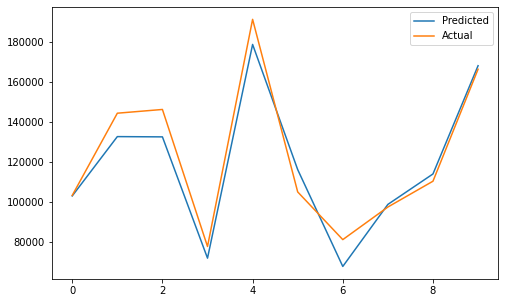

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(lasso_y_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
r2_score(y_train, lasso_y_train)

0.9501847315426798

In [ ]:
r2_lasso = r2_score(y_test, lasso_y_test)
r2_lasso

0.9347989116076312

In [ ]:
n = X_test.shape[0]
k = X_test.shape[1]

# Calculate the adjusted R-squared
radj_lasso = 1 - (1 - r2) * (n - 1) / (n - k - 1)
print(f'Adjusted R-squared: {radj_lasso:.4f}')

Adjusted R-squared: 0.8041


#**Lasso Regression**

Mean squared error = **83385123.79**

Mean absolute error = **7509.684**

Root Mean squared error = **9131.545**

Lasso: R2 score for Train Data = **0.9501**

Lasso: R2 score for Test Data = **0.9347**

Adjusted R-squarede for the data = **0.8041**

# **Lasso Regression with Hyper parameter tuning**

In [ ]:
parameters_lasso = {'alpha':[ 0.1,0.3,0.5,1,3,5,10,15,20,30,50]}

lassocv = GridSearchCV(lasso,parameters_lasso,scoring='neg_mean_squared_error',cv=5)

In [ ]:
lassocv.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.829e+07, tolerance: 4.896e+06
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.1, 0.3, 0.5, 1, 3, 5, 10, 15, 20, 30, 50]},
             scoring='neg_mean_squared_error')

In [ ]:
L_y_test_CV = lassocv.predict(X_test)
L_y_train_CV = lassocv.predict(X_train)

In [ ]:
lasso_params_1 = lassocv.best_params_
print("Best parameter of Lasso:",lasso_params_1)

lasso_score_1 = lassocv.best_score_
print("Best parameter of Lasso:",lasso_score_1)

MSE_lasso_HP = mean_squared_error(y_test, L_y_test_CV)
print("MSE for Lasso",MSE_lasso_HP)

# Root Mean Squared Error
RMSE_lasso_HP = math.sqrt(mean_squared_error(y_test, L_y_test_CV))
print("RMSE for Lasso",RMSE_lasso_HP)

MAE_lasso_HP = mean_absolute_error(y_test, L_y_test_CV)
print("MAE for Lasso",MAE_lasso_HP)

lasso_r2_train = r2_score(y_train, L_y_train_CV)
print("R2 for Lasso train data",lasso_r2_train)

lasso_H_T_r2 = r2_score(y_test, L_y_test_CV)
print("R2 for Lasso test data",lasso_H_T_r2)

n = X_test.shape[0]
k = X_test.shape[1]

# Calculate the adjusted R-squared
HT_lasso = 1 - (1 - lasso_H_T_r2) * (n - 1) / (n - k - 1)
print(f'Adjusted R-squared: {HT_lasso:.4f}')

Best parameter of Lasso: {'alpha': 50}
Best parameter of Lasso: -139628405.9576257
MSE for Lasso 79035527.34639177
RMSE for Lasso 8890.192762049188
MAE for Lasso 7322.344193119759
R2 for Lasso train data 0.9501223064842906
R2 for Lasso test data 0.9381999789670982
Adjusted R-squared: 0.8146


# **Lasso Regression with Hyper Parameter Tuning**

Best parameter of Lasso: **{'alpha': 50}**

Best parameter of Lasso: **-139628405.9576257**

Mean squared error = **79035527.34639**

Mean absolute error = **7322.3441**

Root Mean squared error = **8890.192**

Ridge: R2 score for Train Data = **0.9501**

Ridge: R2 score for Test Data = **0.9381**

Adjusted R-squarede for the data = **0.8146**

# **RIDGE Regression**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [ ]:
ridge = Ridge()
ridge.fit(X_train,y_train)

Ridge()

In [ ]:
R_y_test = ridge.predict(X_test)
R_y_train = ridge.predict(X_train)

### **Plot to compare Actual and Predicted values in Ridge Regression**

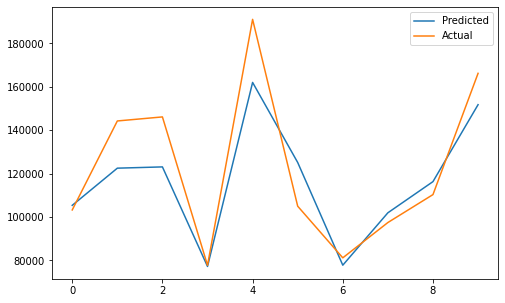

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(R_y_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
Ridge_MSE = mean_squared_error(y_test, R_y_test)
Ridge_MSE

253197124.19952044

In [ ]:
# MAE
Ridge_MAE = mean_absolute_error(y_test, R_y_test)
Ridge_MAE

12487.510643379404

In [ ]:
# Test performance
Ridge_RMSE = math.sqrt(mean_squared_error(y_test, R_y_test))
Ridge_RMSE

15912.169060172797

**R2 score for Test data**

In [ ]:
r2_ridge = r2_score(y_test, R_y_test)
r2_ridge

0.8020183058636227

In [ ]:
# ridge.score(X_test, y_test)

**R2 score for Train data**

In [ ]:
r2_score(y_train, R_y_train)

0.9070974955252402

In [ ]:
# ridge.score(X_train, y_train)

**Ridge Regression**

Ridge: R2 score for Train Data = **0.907**

Ridge: R2 score for Test Data = **0.802**

In [ ]:
r2_ridge = r2_score(y_test, R_y_test)
r2_ridge

0.8020183058636227

In [ ]:
n = X_test.shape[0]
k = X_test.shape[1]

# Calculate the adjusted R-squared
radj_ridge = 1 - (1 - r2) * (n - 1) / (n - k - 1)
print(f'Adjusted R-squared: {radj_ridge:.4f}')

Adjusted R-squared: 0.8041


#**Ridge Regression**

Mean squared error = **253197124.199**

Mean absolute error = **12487.51**

Root Mean squared error = **15912.169**

Ridge: R2 score for Train Data = **0.907**

Ridge: R2 score for Test Data = **0.802**

Adjusted R-squarede for the data = **0.8041**

# **Ridge Regression with Hyper Parameter Tuning**

In [ ]:
parameters_Ridge = {'alpha':[ 0.1,0.3,0.5,1,3,5,10,15,20,30,50]}

In [ ]:
ridgecv = GridSearchCV(ridge,parameters_Ridge,scoring='neg_mean_squared_error',cv=5)

In [ ]:
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 0.3, 0.5, 1, 3, 5, 10, 15, 20, 30, 50]},
             scoring='neg_mean_squared_error')

In [ ]:
R_y_test_CV = ridgecv.predict(X_test)
R_y_train_CV = ridgecv.predict(X_train)

In [ ]:
ridgecv.best_params_

{'alpha': 0.1}

In [ ]:
ridgecv.best_score_

-142882469.10702828

In [ ]:
ridge_params_1 = ridgecv.best_params_
print("Best parameter of Ridge:",ridge_params_1)

ridge_score_1 = ridgecv.best_score_
print("Best parameter of Ridge:",ridge_score_1)

Best parameter of Ridge: {'alpha': 0.1}
Best parameter of Ridge: -142882469.10702828


In [ ]:
Ridge_MSE_HP = mean_squared_error(y_test, R_y_test_CV)
Ridge_MSE_HP

103881620.89575277

In [ ]:
# Root Mean Squared Error
Ridge_RMSE_HP = math.sqrt(mean_squared_error(y_test, R_y_test_CV))
Ridge_RMSE_HP

10192.233361523507

In [ ]:
Ridge_MAE_HP = mean_absolute_error(y_test, R_y_test_CV)
Ridge_MAE_HP

8258.19744260046

In [ ]:
ridge_H_T_r2_train = r2_score(y_train, R_y_train_CV)
ridge_H_T_r2_train

0.9488374029039357

In [ ]:
ridge_H_T_r2 = r2_score(y_test, R_y_test_CV)
ridge_H_T_r2

0.9187721449854722

In [ ]:
n = X_test.shape[0]
k = X_test.shape[1]

# Calculate the adjusted R-squared
HT_ridge = 1 - (1 - ridge_H_T_r2) * (n - 1) / (n - k - 1)
print(f'Adjusted R-squared: {HT_ridge:.4f}')

Adjusted R-squared: 0.7563


#**Ridge Regression with Hyper Parameter Tuning**

Best parameter of Ridge: **{'alpha': 0.1}**

Best parameter of Ridge: **-142882469.10702828**

Mean squared error = **103881620.895**

Mean absolute error = **8258.197**

Root Mean squared error = **10192.233**

Ridge: R2 score for Train Data = **0.9488**

Ridge: R2 score for Test Data = **0.9187**

Adjusted R-squarede for the data = **0.7563**

# **ElasticNet Regression**

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
elastic = ElasticNet()
parameters_elastic = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,0.02,0.05,1,5,10,20,30,40,45,50,55,60,100,150,200],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8,1,2,3,5,10,15,20]}
elastic_regressor = GridSearchCV(elastic, parameters_elastic, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

In [ ]:
elastic_regressor.best_params_

{'alpha': 200, 'l1_ratio': 1}

In [ ]:
elastic_regressor.best_score_

-129742382.96835688

In [ ]:
y_pred_elastic_test1 = elastic_regressor.predict(X_test)
y_pred_elastic_train1 = elastic_regressor.predict(X_train)

In [ ]:
MSE  = mean_squared_error(y_test, y_pred_elastic_test1)
print("MSE :" , MSE)

MAE  = mean_absolute_error(y_test, y_pred_elastic_test1)
print("MAE :" , MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_test = r2_score(y_test, y_pred_elastic_test1)
r2_train = r2_score(y_train, y_pred_elastic_train1)

print("R2 for Test data :" ,r2_test)
print("R2 for Train data:" ,r2_train)
print("Adjusted R2 : ",1-(1-r2_test)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 68388566.02819215
MAE : 6806.150283360187
RMSE : 8269.737966114291
R2 for Test data : 0.9465251265999781
R2 for Train data: 0.9492921016971518
Adjusted R2 :  0.8395753797999344


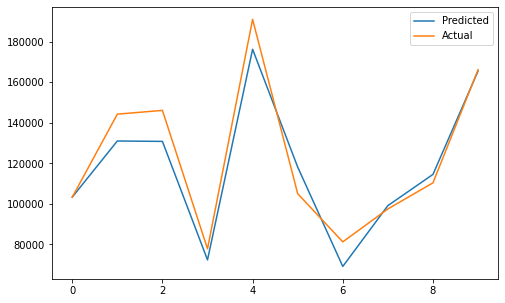

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(y_pred_elastic)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE : 68388566.02819215
MAE : 6806.150283360187
RMSE : 8269.737966114291
R2 for Test data : 0.9465251265999781
R2 for Train data: 0.9492921016971518
Adjusted R2 :  0.8395753797999344

#**ElasticNet Regression with Hyper Parameter Tuning**

Best parameters = **{'alpha': 200, 'l1_ratio': 1}**

Best score = **-129742382.96835688**

Mean squared error = **68388566.0281**

Mean absolute error = **6806.1502**

Root Mean squared error = **8269.737**

R2 score for Train Data = **0.94929**

R2 score for Test Data = **0.94652**

Adjusted R-squarede for the data = **0.83957**

#<b>Evaluating the models

In [ ]:
models= ['Linear Regression', 'Lasso Regression', 'Lasso Regression HP','Ridge Regression', 'Ridge Regression HP','ElasticNet']

In [ ]:
test_mse= [Linear_MSE, mean_lasso_reg, MSE_lasso_HP, Ridge_MSE, Ridge_MSE_HP, MSE]
test_mae= [7514.29, 7509.684, 7322.3441, 12487.51, 8258.197, 6806.1502]
test_rmse= [9137.99, 9131.545, 8890.192, 15912.169, 10192.233, 8269.737]
train_r2= [0.9501, 0.9501, 0.9501, 0.907, 0.9488, 0.94929]
test_r2= [0.9347, 0.9347, 0.9381, 0.802, 0.9187, 0.94652]
test_adjusted_r2= [0.8041, 0.8041, 0.8146, 0.8041, 0.7563,0.83957]
best_para = ['-','-',{'alpha': 50},'-',{'alpha': 0.1},{'alpha': 200, 'l1_ratio': 1}]
best_sco = ['-','-',-139628405.957,'-',-142882469.107,-129742382.968]

<b>Model Comparison & Selection

In [ ]:
model_comparison = pd.DataFrame({'Model Name': models,
                          'MSE': test_mse,'MAE': test_mae,'RMSE': test_rmse,
                          'Train R^2': train_r2,'Test R^2': test_r2,
                          'Adjusted R^2': test_adjusted_r2,'Best Params': best_para,'Best Score': best_sco})
model_comparison

,Model Name,MSE,MAE,RMSE,Train R^2,Test R^2,Adjusted R^2,Best Params,Best Score
0,Linear Regression,8.350286e+07,7514.2900,9137.990,0.95010,0.93470,0.80410,-,-
1,Lasso Regression,8.338512e+07,7509.6840,9131.545,0.95010,0.93470,0.80410,-,-
2,Lasso Regression HP,7.903553e+07,7322.3441,8890.192,0.95010,0.93810,0.81460,{'alpha': 50},-139628405.957
3,Ridge Regression,2.531971e+08,12487.5100,15912.169,0.90700,0.80200,0.80410,-,-
4,Ridge Regression HP,1.038816e+08,8258.1970,10192.233,0.94880,0.91870,0.75630,{'alpha': 0.1},-142882469.107
5,ElasticNet,6.838857e+07,6806.1502,8269.737,0.94929,0.94652,0.83957,"{'alpha': 200, 'l1_ratio': 1}",-129742382.968


# **Conclusion**

*   The table shows the performance metrics of several different regression models, including Linear Regression, Lasso Regression, Lasso Regression with Hyper parameter testing, Ridge Regression, Ridge Regression Hyper parameter testing, and ElasticNet.

*   ElasticNet is the best performing models it has the highest test set R^2 score and the lowest MSE among all models, which suggests that it makes the best predictions and has the lowest error on the test set

*   Lasso Regression Hyperparameter tuning has the second highest test set R^2 score and second lowest MSE among all the other models, which suggests that it makes the best predictions and has the lowest error on the test set next to elasticNet.

*   The Ridge Regression Hyperparameter tuning and ElasticNet models also had good performance on test sets, they have lower MSE and R^2 on test set than Linear Regression, Lasso Regression, and Ridge Regression alone.

*   The Linear Regression, Lasso Regression, and Ridge Regression models have similar R^2 values on the training set but different MSE, MAE and RMS values,suggests that they might be overfitting and not generalizing as well as other models and we did not use Hyperparameter tuning to compare them with the models with Hyperparameter tuning to check for differences suggests that they might be overfitting and not generalizing as well as other models.

*   Ridge Regression and Ridge Regression Hyperparameter tuning models have significantly higher MSE values than the other models, which suggests they may not be as accurate at making predictions.

*   The best score of the model is now known, providing insight into the model's best performance among all hyperparameter tuning runs.

## **Why ElasticNet is a better performing Algorithm**

ElasticNet
Elastic Net is a linear regression model that combines the properties of both Ridge Regression and Lasso Regression. It adds a mixing parameter, l1_ratio, which controls the balance between L1 and L2 regularization

Elastic Net can be a better choice than Ridge or Lasso Regression alone because it can address some of the limitations of those methods.

Ridge Regression addresses the problem of correlated features by adding a L2 regularization term to the cost function, which shrinks the coefficients of correlated features closer to zero, but does not set any coefficients exactly to zero. In contrast, Lasso Regression adds a L1 regularization term to the cost function, which can set some coefficients to zero, effectively removing them from the model. However, Lasso Regression can be overly aggressive in setting coefficients to zero and may eliminate important features.

Elastic Net combines the strengths of Ridge and Lasso Regression by adding both L1 and L2 regularization terms to the cost function. The mixing parameter (l1_ratio) allows you to control the balance between the two penalties, so you can tune the model to give more importance to either L1 or L2 regularization, or to balance the two.

In this way, Elastic Net can provide a balance between L1 and L2 regularization and address the limitations of Ridge and Lasso Regression, and it can provide a more robust and accurate model.

Also, in practice, when you have high dimensionality dataset, Elastic Net sometimes perform better than Lasso, as Lasso can be affected by the scaling of the predictors. Elastic net, however is robust to scaling.

# **Exporting the Machine Learning Model**

**Using "pickle" library**

In [ ]:
# prompt: can you write me a code for checking 1000 iterations for a XGBooster algorithm

import xgboost

# Define the model
model = xgboost.XGBClassifier()

# Define the hyperparameter grid
param_grid = {
  'learning_rate': [0.01, 0.1, 0.2],
  'max_depth': [None, 1, 2, 3],
  'n_estimators': [100, 200, 500]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
model = xgboost.XGBClassifier(**best_params)
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)



In [ ]:
import pickle

In [ ]:
pickle.dump(regressor,open('MODEL.pkl','wb'))

**Using "joblib" library**

In [ ]:
from joblib import dump, load

dump(regressor, 'MODEL.joblib')


['MODEL.joblib']

Thank You

---
